#### Introduction
I am going to explore and process California Housing Prices dataset from Kaggle in order to create ML models that predicts the mean house price within a block.

#### About the Dataset

This is the dataset used in the second chapter of Aurélien Géron's recent book 'Hands-On Machine learning with Scikit-Learn and TensorFlow'. It serves as an excellent introduction to implementing machine learning algorithms because it requires rudimentary data cleaning, has an easily understandable list of variables and sits at an optimal size between being to toyish and too cumbersome.

The data contains information from the 1990 California census. So although it may not help you with predicting current housing prices like the Zillow Zestimate dataset, it does provide an accessible introductory dataset for teaching people about the basics of machine learning.

The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. Be warned the data aren't cleaned so there are some preprocessing steps required!

Link: https://www.kaggle.com/datasets/camnugent/california-housing-prices

#### Import libraries and load the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
os.environ["LOKY_MAX_CPU_COUNT"] = "6"

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("housing.csv")

#### Exploratory Data Analysis

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


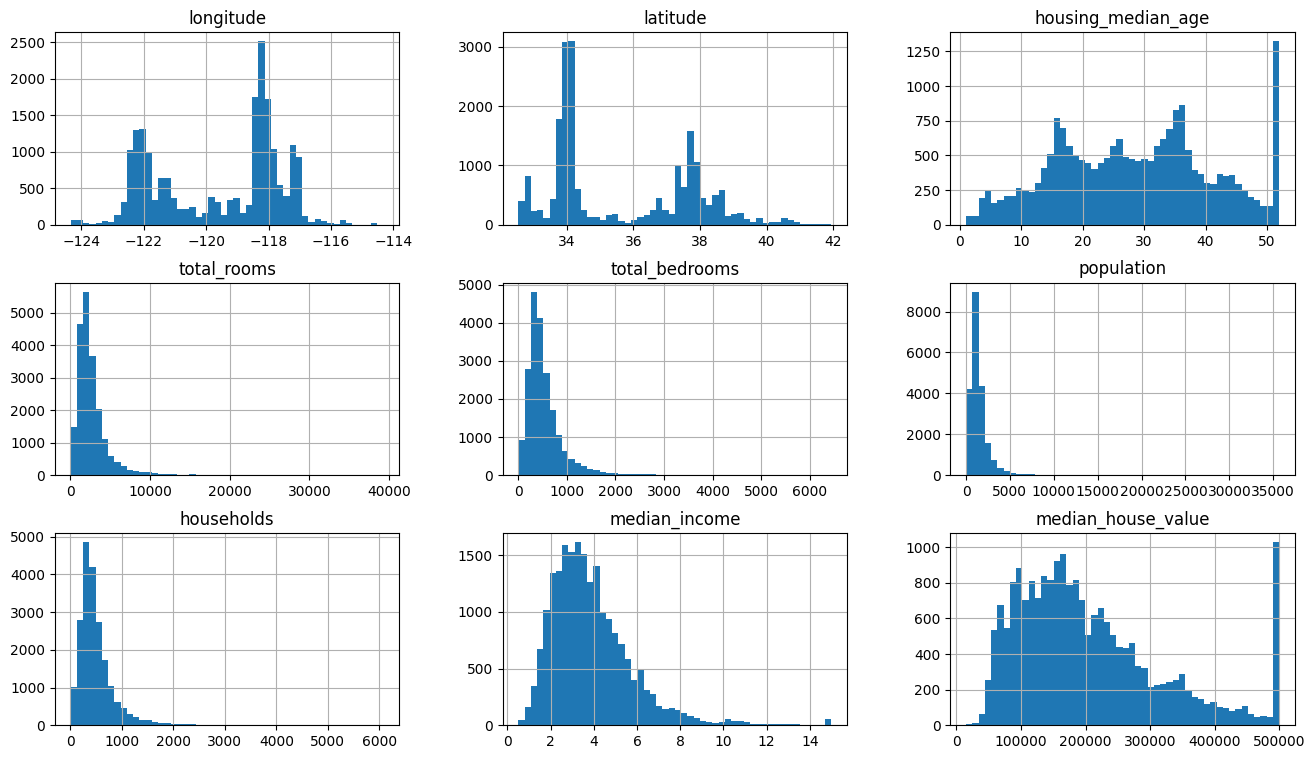

In [5]:
df.hist(bins=50 ,figsize=(16, 9));

It seems there are outliers in many fields, indicated by a skew towards the left side for the majority of samples
Additionally, the fact that so many houses have a median value of 500.000 and age of 52 suggests there might have been a limit value during data collection.

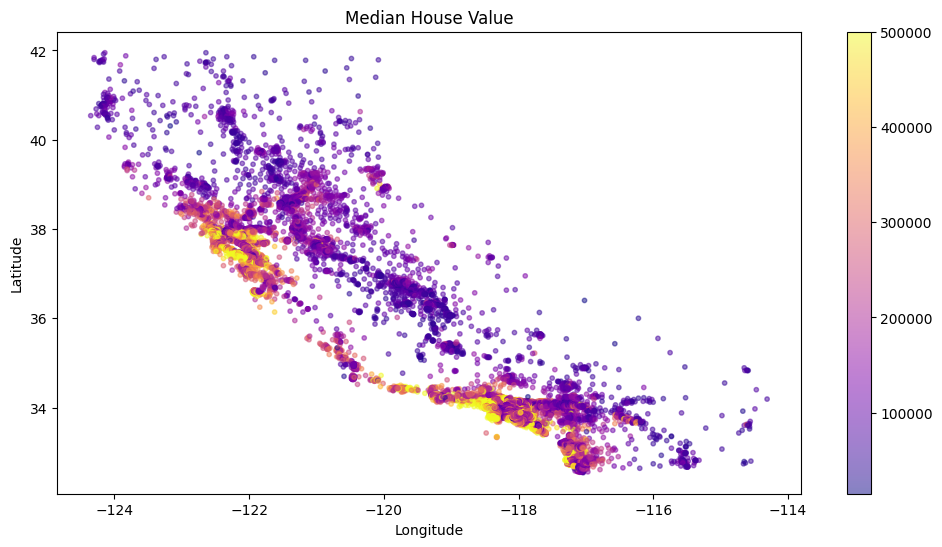

In [6]:
plt.figure(figsize=(12, 6))
scatter = plt.scatter(df.longitude, df.latitude, c=df.median_house_value, cmap='plasma', alpha=0.5, s=10)
plt.colorbar(scatter)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Median House Value')
plt.show()

I can see that the closer a house is to the beach, the highest is its value. Aditionally, it seems there are 2 center zones with the highest values.

#### Data Cleaning

In [7]:
df.size

206400

In [8]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df = df[df.total_rooms < df.total_rooms.quantile(0.99)]
df = df[df.total_rooms > df.total_rooms.quantile(0.01)]
df = df[df.population < df.population.quantile(0.99)]
df = df[df.population > df.population.quantile(0.01)]

I am cleaning up a bit both the min and max values for total_rooms and population features, becuase I noticed outliers before

In [11]:
df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [12]:
df = df.join(pd.get_dummies(df["ocean_proximity"], drop_first=True).astype(int))
df.drop(columns="ocean_proximity", inplace=True)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0


In [13]:
column_names = {'INLAND': 'inland',
                'ISLAND': 'island',
                'NEAR BAY': 'near_bay',
                'NEAR OCEAN': 'near_ocean'}

df.rename(columns=column_names, inplace=True)

#### Feature Engineering

In [14]:
df["bedrooms_rooms"] = df.total_bedrooms / df.total_rooms
df["rooms_households"] = df.total_rooms / df.households
df["rooms_population"] = df.total_rooms / df.population
df["population_households"] = df.population / df.households
df['diagonal_coordenate'] = df['longitude'] + df['latitude']


In [15]:
def get_distance(x, y):
    center1 = [-122.5, 37,2]
    center2 = [-119.3, 34.4]
    distance1 = ((center1[0] - x)**2 + (center1[1] - y)**2)**0.5
    distance2 = ((center2[0] - x)**2 + (center2[1] - y)**2)**0.5
    return min(distance1, distance2)

In [16]:
df["center_distance"] = df.apply(lambda row: get_distance(row["longitude"], row["latitude"]), axis=1)

I tried implenting k-means clustering for longitude-latitude data but it didn´t perform well. I am certain there are better ways to approach geospatial information. Anyways, that isn´t what I wanted to focus on in this project.

In [17]:
corr = abs(df.corr().median_house_value.drop("median_house_value")).sort_values(ascending=False)
corr

median_income            0.696431
diagonal_coordenate      0.494771
inland                   0.486557
center_distance          0.447177
rooms_population         0.313488
bedrooms_rooms           0.261987
population_households    0.230065
rooms_households         0.216466
total_rooms              0.179095
near_bay                 0.159950
latitude                 0.145948
near_ocean               0.137287
housing_median_age       0.112763
households               0.082401
total_bedrooms           0.062032
longitude                0.044019
population               0.037584
island                   0.023964
Name: median_house_value, dtype: float64

In [18]:
corr[-5:].index

Index(['households', 'total_bedrooms', 'longitude', 'population', 'island'], dtype='object')

In [19]:
df.drop(columns=corr[-5:].index, inplace=True)

Often, it is better to have less features so the model can focus on them and not waste sources on not really relevant data. Anyways, it's important to note that we are not considering non-linear correlations here. In complex models or specific cases, these non-linear correlations might be crucial

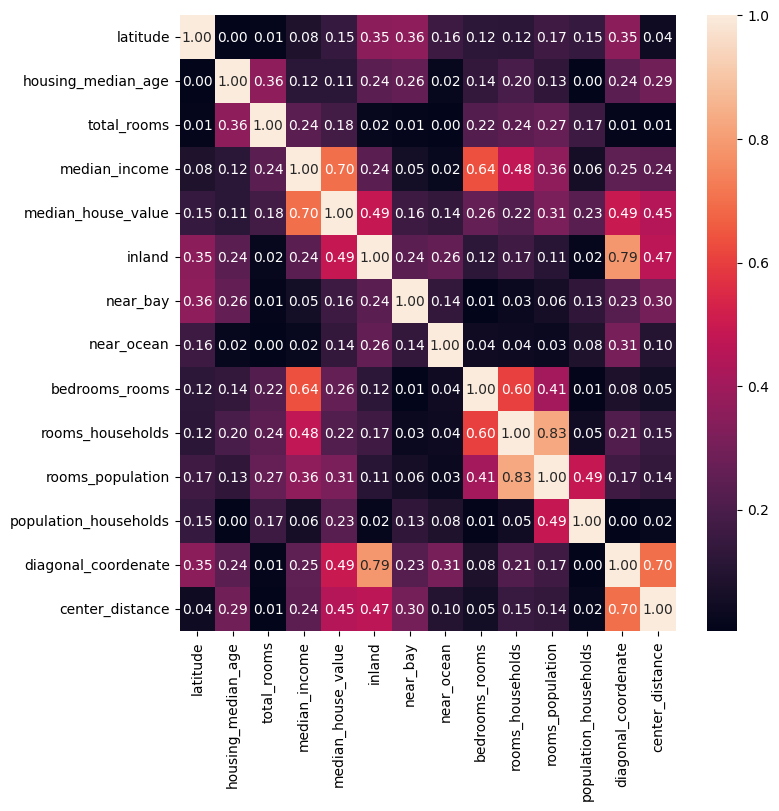

In [20]:
plt.figure(figsize=(8, 8))
sns.heatmap(abs(df.corr()), fmt=".2f", annot=True);

Here I´m just looking for extremely high correlation coefficients to drop them since they provide the same information to the model.

In [21]:
df = df.sample(frac=1).reset_index(drop=True)  # Shuffle the rows, just in case it can cause any problem.

In [22]:
x = df.drop(columns='median_house_value')
y = df['median_house_value']

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

x = StandardScaler().fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=1)

#### Machine Learning Models

In [24]:
def train_model(model, X_train, X_test, y_train, y_test, params={}):
    
    if params:
        model.set_params(**params)
        
    model.fit(X_train, y_train)

    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    y_predicted = model.predict(X_test)
    mse = mean_squared_error(y_test, y_predicted)
    rmse = mean_squared_error(y_test, y_predicted, squared=False)

    print("Model:", model.__class__.__name__)
    print(f"Train Score: {train_score:.3f}")
    print(f"Test Score: {test_score:.3f}")
    print(f"MSE: {int(mse):,}")
    print(f"RMSE: {int(rmse):,}")
    

In [25]:
from sklearn.linear_model import LinearRegression
train_model(LinearRegression(), X_train, X_test, y_train, y_test)

Model: LinearRegression
Train Score: 0.701
Test Score: 0.715
MSE: 3,854,451,991
RMSE: 62,084


In [26]:
from sklearn.neighbors import KNeighborsRegressor
train_model(KNeighborsRegressor(), X_train, X_test, y_train, y_test, {"n_neighbors": 10, "n_jobs":-1})

Model: KNeighborsRegressor
Train Score: 0.838
Test Score: 0.817
MSE: 2,481,548,043
RMSE: 49,815


In [27]:
from sklearn.ensemble import RandomForestRegressor
train_model(RandomForestRegressor(), X_train, X_test, y_train, y_test, {"n_estimators": 50, "n_jobs":-1})

Model: RandomForestRegressor
Train Score: 0.979
Test Score: 0.870
MSE: 1,763,069,772
RMSE: 41,988


In [28]:
from sklearn.ensemble import GradientBoostingRegressor
train_model(GradientBoostingRegressor(), X_train, X_test, y_train, y_test)

Model: GradientBoostingRegressor
Train Score: 0.837
Test Score: 0.830
MSE: 2,304,468,452
RMSE: 48,004


Although it shows overfitting, the best among these four models is Random Forest Regressor, with a test score of 0.87.